In [1]:
import os
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from scripts.path import return_path
PATH = return_path() + 'video_games_sales_data/'

## DATA GATHERING

In [2]:
df = pd.read_csv(f'{PATH}vg_sales.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## SIMPLE ANALYSIS

In [3]:
# Categorical or columns used for reference/comparison
reference_columns = ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

# Column List & NOT NA Data on Column / Total Entries
for x in reference_columns:
    print(f'{x} ({len(set(df[x]))}): {list(set(df[x]))[0:10]}')
    print('NOT NA:' ,'%.4f' % (df[x].notna().sum()/df.shape[0]*100) + "%\n")

Name (11563): [nan, 'Wild ARMs: Alter Code F', 'Metal Fight Beyblade: Choujou Kessen! Big Bang Bladers', 'Smart Bomb', 'Housekeeping', 'Bolt', 'Wiffle Ball Advance', 'Poyo Poyo Kansatsu Nikki', 'Detective Conan: Marionette Symphony', 'Madden NFL 97']
NOT NA: 99.9880%

Platform (31): ['PSV', 'PS2', 'PC', 'TG16', 'DS', 'GG', 'SAT', 'XOne', 'GEN', 'PS3']
NOT NA: 100.0000%

Genre (13): [nan, 'Action', 'Fighting', 'Misc', 'Sports', 'Platform', 'Puzzle', 'Shooter', 'Strategy', 'Role-Playing']
NOT NA: 99.9880%

Publisher (582): [nan, 'Mojang', 'Zoo Digital Publishing', 'Nordcurrent', 'Giza10', 'Game Arts', 'Adeline Software', 'Elite', 'Mystique', 'Swing! Entertainment']
NOT NA: 99.6770%

Developer (1697): [nan, 'Red Zone Entertainment', 'PlatinumGames', 'Sand Grain Studios', 'The Digital Lounge, Dino Dini', 'Nintendo, Camelot Software Planning', 'Santa Cruz Games', 'Big Head Games Ltd.', 'SCEJ', 'SuperBot Entertainment']
NOT NA: 60.3864%

Rating (9): [nan, 'EC', 'E', 'RP', 'M', 'K-A', 'AO', '

## DATA VISUALIZATION

### COLORS

In [4]:
print('Available colors:')
px.colors.qualitative.swatches().update_layout(width=800, height=500).show()

Available colors:


### LINE CHART

In [5]:
# Genre and Year_of_Release with Sales Data
genre_temporal = df.groupby(['Genre', 'Year_of_Release']).sum().reset_index()
print('Video Games Annual Sales by Genre')
display(genre_temporal.head())

# Data Visualization - Video Games Annual Sales by Genre
(
    px.line(data_frame=genre_temporal, x='Year_of_Release', y='Global_Sales',
        width=800, height=400, color='Genre',
        color_discrete_sequence=px.colors.qualitative.Dark24, # sb.color_palette(palette='bright').as_hex()
        labels={"Global_Sales": "Global Sales (in Millions)"},
        title="Video Game Annual Sales by Genre")
        .update_layout(margin=dict(l=20, r=10, t=60, b=20))
        .show()
) 

Video Games Annual Sales by Genre


,Genre,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,Action,1980.0,0.32,0.02,0.00,0.00,0.34,0.0,0.0,0.0
1,Action,1981.0,13.86,0.81,0.00,0.12,14.84,0.0,0.0,0.0
2,Action,1982.0,6.07,0.38,0.00,0.05,6.52,0.0,0.0,0.0
3,Action,1983.0,2.67,0.17,0.00,0.02,2.86,0.0,0.0,0.0
4,Action,1984.0,0.80,0.19,0.83,0.03,1.85,0.0,0.0,0.0


In [6]:
# Annual Video Games Sales
all_temporal = df.groupby(['Year_of_Release']).sum().reset_index()
print('Video Games Annual Sales')
display(all_temporal.head())

# Data Visualization - Annual Video Games Sales
sales_columns = [x for x in all_temporal if re.match("\\S+_Sales", x)]

(
    px.line(data_frame=all_temporal, x='Year_of_Release', y=sales_columns,
        width=800, height=400,
        labels={"value": "Total Sales (in Millions)", "variable": "Region"},
        title="Video Game Annual Sales")
        .update_layout(margin=dict(l=20, r=10, t=60, b=20))
        .show()
)       

Video Games Annual Sales


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,1980.0,10.59,0.67,0.00,0.12,11.38,0.0,0.0,0.0
1,1981.0,33.40,1.96,0.00,0.32,35.77,0.0,0.0,0.0
2,1982.0,26.92,1.65,0.00,0.31,28.86,0.0,0.0,0.0
3,1983.0,7.76,0.80,8.10,0.14,16.79,0.0,0.0,0.0
4,1984.0,33.28,2.10,14.27,0.70,50.36,0.0,0.0,0.0


## CORRELATION ANALYSIS

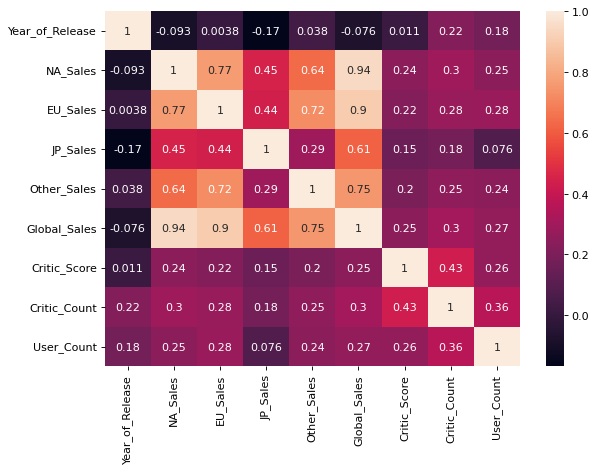

In [7]:
fig, ax = plt.subplots(figsize=(8, 6), layout='tight', facecolor='white', dpi=80)
ax = sb.heatmap(df.corr(method='pearson'), annot=True, cbar='viridis')

## SOURCE
https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings